# CellTypist cell classification
Official tutorial available [here](https://colab.research.google.com/github/Teichlab/celltypist/blob/main/docs/notebook/celltypist_tutorial.ipynb#scrollTo=tribal-broadway).

In [1]:
import celltypist
from celltypist import models
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
DATASET_ROOT = "../dataset"
DATASET_NAMES = ["PBMC1", "PBMC2", "PBMC3", "PBMC4"]
CELLTYPIST_MODEL = ['Immune_All_Low.pkl', 'Immune_All_Low.pkl', 'Immune_All_Low.pkl', 'Immune_All_Low.pkl']
DATASET_DIR = [f"{DATASET_ROOT}/{name}" for name in DATASET_NAMES]
FILTERED_DATASET_DIR = [f"{DATASET_ROOT}/{name}-Filtered/raw" for name in DATASET_NAMES]
FILTERED_DATASET_DIR_10X = [x + "/10x" for x in FILTERED_DATASET_DIR]

Download the models

In [3]:
models.download_models(force_update = False) # more info at https://www.celltypist.org/models

📂 Storing models in /Users/irenetesta/.celltypist/data/models
⏩ Skipping [1/44]: Immune_All_Low.pkl (file exists)
⏩ Skipping [2/44]: Immune_All_High.pkl (file exists)
⏩ Skipping [3/44]: Adult_CynomolgusMacaque_Hippocampus.pkl (file exists)
⏩ Skipping [4/44]: Adult_Human_PancreaticIslet.pkl (file exists)
⏩ Skipping [5/44]: Adult_Human_Skin.pkl (file exists)
⏩ Skipping [6/44]: Adult_Mouse_Gut.pkl (file exists)
⏩ Skipping [7/44]: Adult_Mouse_OlfactoryBulb.pkl (file exists)
⏩ Skipping [8/44]: Adult_Pig_Hippocampus.pkl (file exists)
⏩ Skipping [9/44]: Adult_RhesusMacaque_Hippocampus.pkl (file exists)
⏩ Skipping [10/44]: Autopsy_COVID19_Lung.pkl (file exists)
⏩ Skipping [11/44]: COVID19_HumanChallenge_Blood.pkl (file exists)
⏩ Skipping [12/44]: COVID19_Immune_Landscape.pkl (file exists)
⏩ Skipping [13/44]: Cells_Fetal_Lung.pkl (file exists)
⏩ Skipping [14/44]: Cells_Intestinal_Tract.pkl (file exists)
⏩ Skipping [15/44]: Cells_Lung_Airway.pkl (file exists)
⏩ Skipping [16/44]: Developing_Human

Perform cell labeling using majority_voting and 'best match' methods

In [4]:
def annotate_10x_dataset(datadir, model_name, out_dir):
    input_matrix = datadir + "/matrix.mtx"
    gene_file = datadir + '/genes.tsv'
    gene_id_file = datadir + "/gene_ids.csv"
    cell_id_file = datadir + "/barcodes.tsv"

    genes = pd.read_csv(gene_file, sep='\t', header=None)
    gene_ids = genes[0]
    gene_ids.to_csv(gene_id_file, index=False, header=False)

    predictions = celltypist.annotate(
        input_matrix,
        model = model_name,
        transpose_input = True,
        majority_voting = True, # refines cell identities within local subclusters after an over-clustering approach
        mode = 'best match', # choose the cell type with the largest score/probability as the final prediction
                             # setting to 'prob match' will enable a multi-label classification,
                             # which assigns 0 (i.e., unassigned), 1, or >=2 cell type labels to each query
        gene_file=gene_id_file,
        cell_file=cell_id_file
    )
    predictions.to_table(folder=out_dir, prefix = "Immune_All_Low_")
    labels = predictions.predicted_labels
    labels = labels.rename(columns={"majority_voting": "cluster.ids"})
    labels.reset_index(inplace=True, names='cell')
    labels = labels[["cell", "cluster.ids"]]

    annotation_df = labels.copy()

    mapping = {label: i for i, label in enumerate(labels['cluster.ids'].unique())}
    mapping_df = pd.DataFrame({'go': labels['cluster.ids'].unique()})
    mapping_df.reset_index(inplace=True, names='id')
    mapping_df['id'] = mapping_df['id'] + 1
    mapping_df.to_csv(out_dir + "/celltypist_mapping.csv", index=False)
    
    labels['cluster.ids'] = labels['cluster.ids'].map(mapping)
    labels['cluster.ids'] = labels['cluster.ids'].astype(int)
    labels['cluster.ids'] = labels['cluster.ids'] + 1
    labels.to_csv(out_dir + "/celltypist_labels.csv", index=False)

    return annotation_df

In [5]:
annotations = {}
for i in range(len(DATASET_NAMES)):
    print(f"Annotating {DATASET_NAMES[i]}...")
    annotations[DATASET_NAMES[i]] = annotate_10x_dataset(FILTERED_DATASET_DIR_10X[i], CELLTYPIST_MODEL[i], FILTERED_DATASET_DIR[i])

📁 Input file is '../dataset/PBMC1-Filtered/raw/10x/matrix.mtx'
⏳ Loading data


Annotating PBMC1...


🔬 Input data has 3622 cells and 33538 genes
🔗 Matching reference genes in the model
🧬 5966 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
/Users/irenetesta/anaconda3/envs/chl/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!
📁 Input file is '../dataset/PBMC2-Filtered/raw/10x/matrix.mtx'
⏳ Loading data


Annotating PBMC2...


🔬 Input data has 6019 cells and 36601 genes
🔗 Matching reference genes in the model
🧬 6146 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!
📁 Input file is '../dataset/PBMC3-Filtered/raw/10x/matrix.mtx'
⏳ Loading data


Annotating PBMC3...


🔬 Input data has 11024 cells and 33538 genes
🔗 Matching reference genes in the model
🧬 5966 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!
📁 Input file is '../dataset/PBMC4-Filtered/raw/10x/matrix.mtx'
⏳ Loading data


Annotating PBMC4...


🔬 Input data has 7137 cells and 33538 genes
🔗 Matching reference genes in the model
🧬 5966 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


Save the computed labels

In [6]:
annotation_counts = {}
for i in range(len(DATASET_NAMES)):
    annotation_counts[DATASET_NAMES[i]] = annotations[DATASET_NAMES[i]]['cluster.ids'].value_counts()
    annotation_counts[DATASET_NAMES[i]] = annotation_counts[DATASET_NAMES[i]][annotation_counts[DATASET_NAMES[i]]>0]
    annotation_counts[DATASET_NAMES[i]].to_csv(f"{FILTERED_DATASET_DIR[i]}/celltypist_annotation_counts.csv")

Visualize the results

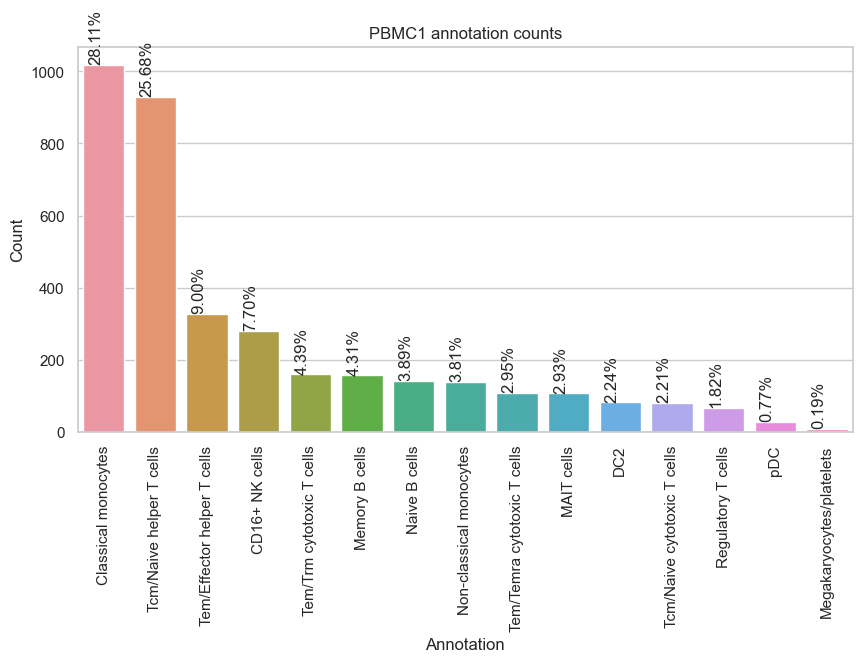

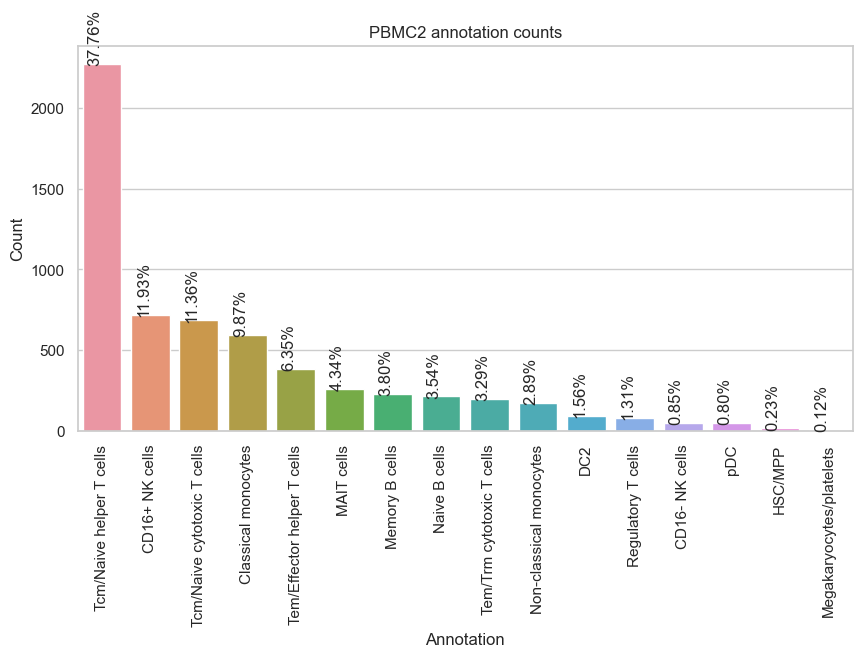

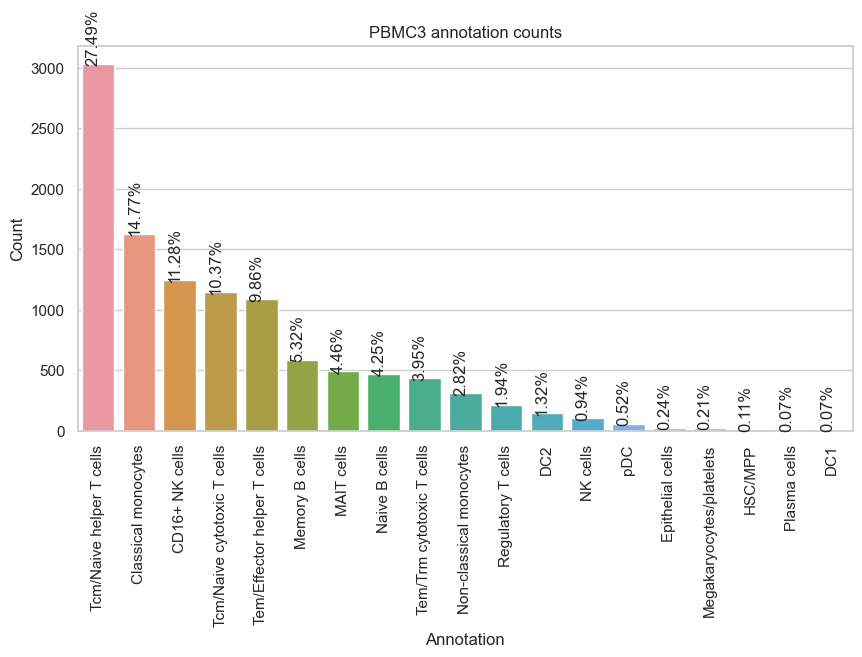

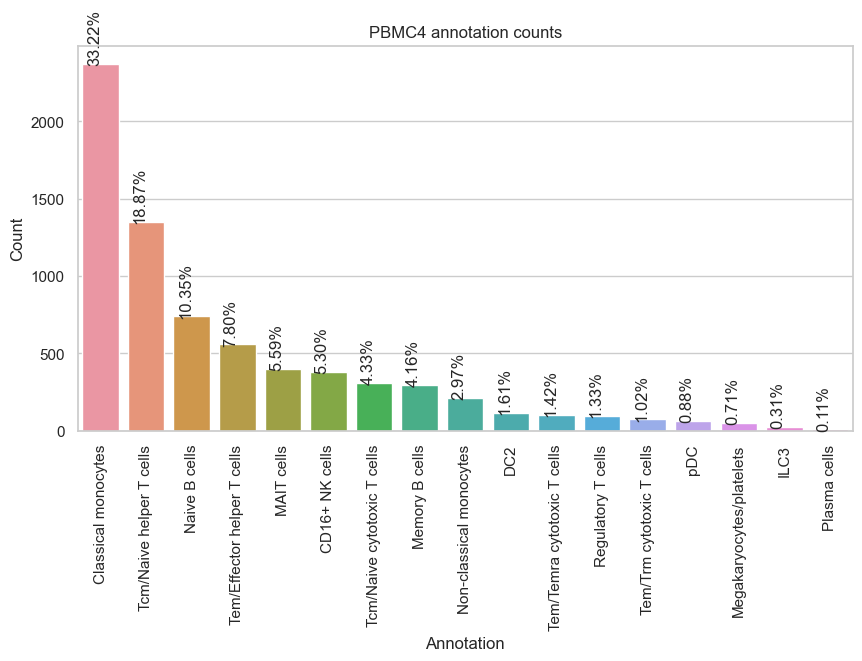

In [7]:
annotation_counts2 = {}
for i in range(len(DATASET_NAMES)):
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(
        x=annotation_counts[DATASET_NAMES[i]].index,
        y=annotation_counts[DATASET_NAMES[i]].values,
        order=annotation_counts[DATASET_NAMES[i]].index
    )
    total = len(annotations[DATASET_NAMES[i]])
    for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.3
        y = p.get_y() + p.get_height() + 10
        ax.annotate(percentage, (x, y), rotation=90)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(f"{DATASET_NAMES[i]} annotation counts")
    ax.set_xlabel("Annotation")
    ax.set_ylabel("Count")
    plt.savefig(f"{FILTERED_DATASET_DIR[i]}/celltypist_annotation_counts.png", bbox_inches='tight')
    plt.show()